# Библиотеки

In [106]:
import sklearn
import pandas as pd
import numpy as np
import pickle
import joblib

import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

from sklearn import svm
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, mean_absolute_error, mean_squared_error, r2_score



# Этапы

## Подготовка данных
### Стандартизация
среднее = 0, среднеквадратичное отклонение = 1
sklearn.preprocessing - SrandartScaler

Scaler = StandartScaler().fit(data_train)

standartized_data= scaler.trainsform(data_train)

### Нормализация
от 0 до 1
sklearn.preprocessing - Normalizer

Scaler = Normalizer().fit(data_train)
standartized_data= scaler.trainsform(data_train)

### Бинаризация
sklearn.preprocessing - Binarizer

binarizer = Binarizer(treshold=0.0).fit(data) - порог для групп < 0  - однагруппа, 0> другая
binary_X = Binarizer.ransform(data)

### Категориальные признаки
Заменяем признак меткой
sklearn.preprocessing - LabelEncoder

enc = LabelEncoder()
data = end.fit_transform(data)


## Модели
sklearn.linear_model - LinearRegression Линейки
sklearn.svm.SVC - опорные вектора
sklearn.naive_bayes - GaussianNB - наивный байесовский классификатор
sklearn.neighbors - KNeighborsClassifier - к-ближайших соседей
обучение без учителя
sklearn.decomposition- PCA - без учителя
sklearn.cluster - KMeans - к-средних


## Обучение модели

С учителем

Без учителя

Оценка качества модели

Кросс-валидация

Сохранение-загрузка

In [15]:
data  = sklearn.datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Обучение пример

## С учителем

In [23]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) # обучающая выборка
y = np.dot(X, np.array([1, 2])) + 3 # тестовая выборка

# создаём объект модели, настраиваем параметры 
lr = LinearRegression()

# обучаем модель передав обучающую выборку X и тестовую выборку
lr = LinearRegression().fit(X, y)

# lr.score(X, y), lr.coef_, lr.intercept_, lr.predict(np.array([[3, 5]]))

(1.0, array([1., 2.]), 3.0000000000000018, array([16.]))

## Без учителя

In [39]:
X = np.array([[1, 2], [1, 4], [1, 6], 
             [10, 2], [10, 4], [10, 0]]) # данные для обучения

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(X)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Получение предсказаний

predict, predict_proba
Где то один где то другой

In [40]:
X = np.array([[1, 2], [1, 4], [1, 6],
             [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(X)

# тестовые данные для полученияпо ним предсказаний
test = np.array([[5, 1], [0, 3], [2,1], [11, 1], [9, 1], [9, 1]])

y = kmeans.predict(test) # вернулись метки классаццццццйцуйуцйуцфывывфы
y

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 0, 0, 0])

In [42]:
X = np.array([[1, 2], [1, 4], [1, 6],
             [10, 2], [10, 4], [10, 0]]) # данные для обучения
Y = np.array([1, 1, 1, 0, 0, 0]) # тестовое

knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X, Y)

# тестовые данные
test = np.array([[5, 1], [0, 3], [2,1], [11, 1], [9, 1], [9, 1]])

y = knn.predict_proba(test) # предсказание- вероятности к 0 и 1
y

array([[0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4]])

# Оценка качества модели пример

In [46]:
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

accuracy_score(y_true, y_pred)

0.5

In [52]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [55]:
recall_score(y_true, y_pred, average='micro')

0.5

In [62]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) # обучающая выборка
y = np.dot(X, np.array([1, 2])) + 3 # тестовая выборка

# создаём объект модели, настраиваем параметры 
lr = LinearRegression()

# обучаем модель передав обучающую выборку X и тестовую выборку
lr = LinearRegression().fit(X, y)
print('Model score: ', lr.score(X, y))

# lr.score(X, y), lr.coef_, lr.intercept_, lr.predict(np.array([[3, 5]]))

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print('MAE: ', mean_absolute_error(y_true, y_pred))
print('MSE: ', mean_squared_error(y_true, y_pred))

Model score:  1.0
MAE:  0.5
MSE:  0.375


# Кросс валидация пример + сплит данных

In [76]:
X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

print('Score: ', clf.score(X_test, y_test))

print('Cross validation')
cv_results = model_selection.cross_validate(clf, X, y, cv=3)

print(cv_results['test_score'])

Score:  0.9777777777777777
Cross validation
[1.   1.   0.98]


# Оптимизация пример

In [77]:
X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)


knn =  KNeighborsClassifier()

# параметры для переборки
params = {'n_neigbors': [1, 2, 3], 'metric': ['euclidean', 'cityblock']}

grid = model_selection.GridSearchCV(estimator=knn, param_grid=params)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

ValueError: Invalid parameter 'n_neigbors' for estimator KNeighborsClassifier(metric='euclidean'). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

# Пример

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt



Processing accurasy for the standardized test dataset with PCA
98.15%



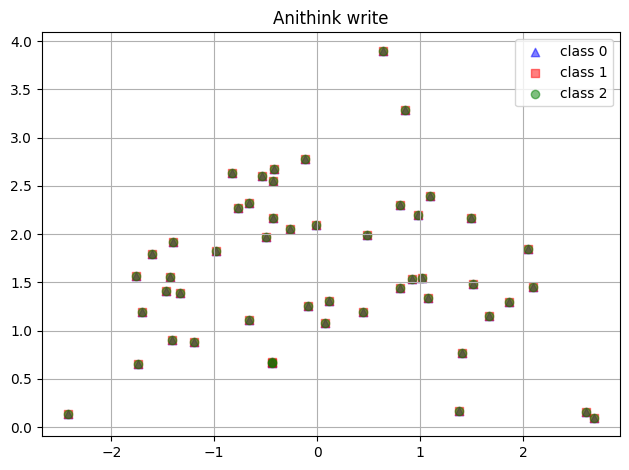

In [97]:
random_state = 42
fig_size = (10, 7)

features, target = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.30, random_state=random_state)

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB()) # по очереди передает  модели для работы с параметрами
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)


print('\nProcessing accurasy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std))) # передали тестовые значения и те что рассчитала модель

pca_std = std_clf.named_steps['pca']

scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# графики
fig, ax2 = plt.subplots(ncols=1)
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == 1, 0],
                X_train_std_transformed[y_train == 1, 1],
                color=c, label='class %s' % l, alpha=0.5, marker=m)
ax2.set_title('Anithink write')
ax2.grid()

ax2.legend()

plt.tight_layout()
plt.show()

# Сохранение и загрузка модели

In [104]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

clf = svm.SVC()
clf.fit(X, y)

# save
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)


clf.predict(X[0:1])

array([0])

In [107]:
joblib.dump(clf, 'model.pkl')
clf2 = joblib.load('model.pkl')

# Пример на задаче от яндекса

In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import pandas as pd

In [10]:
train = pd.read_csv(r'C:\Users\user\Desktop\яндекс\train.tsv', sep='\t', header=None)
test = pd.read_csv(r'C:\Users\user\Desktop\яндекс\test.tsv', sep='\t', header=None)

In [16]:
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

In [17]:
model = linear_model.LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [20]:
result = pd.DataFrame(model.predict(test))
result

,0
0,0.258228
1,0.241187
2,0.296651
3,0.954577
4,0.023343
...,...
995,0.956833
996,0.475801
997,0.851152
998,0.204552


In [24]:
result.to_csv(r'C:\Users\user\Desktop\яндекс\answer.tsv', sep='\t', header=None, index=False)